In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Read the Dataset

In [3]:
import pandas as pd

df = pd.read_csv('MULN.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-23,8.77,9.58,8.65,9.44,9.44,1068100
1,2018-04-24,9.88,10.27,9.00,9.66,9.66,996400
2,2018-04-25,9.75,9.90,8.79,8.84,8.84,540400
3,2018-04-26,8.20,8.50,7.54,8.02,8.02,494700
4,2018-04-27,8.10,8.40,7.93,7.98,7.98,175300


In [4]:
df.shape

(1258, 7)

In [5]:
## Taking the columns needed

In [6]:
close = df[['Date','Close']]

In [8]:
close = close.iloc[:-8,:]

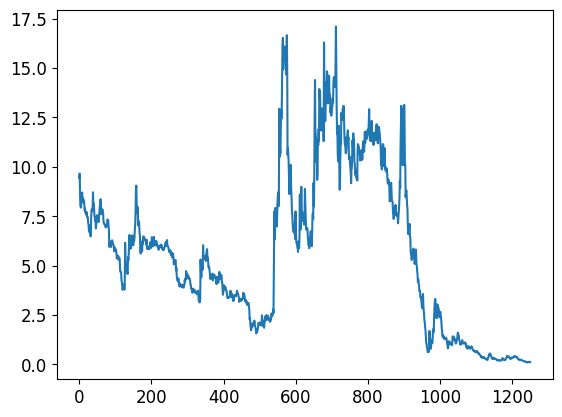

In [9]:
plt.plot(close['Close'])
plt.show()

In [11]:
# Re-organize the data set by last 10 days

temp = np.array(close['Close']).reshape(125,10)

temp

array([[9.44, 9.66, 8.84, ..., 8.41, 8.7 , 8.23],
       [8.43, 8.2 , 8.3 , ..., 7.69, 7.73, 7.58],
       [7.71, 7.57, 7.45, ..., 6.71, 7.05, 6.85],
       ...,
       [0.22, 0.23, 0.22, ..., 0.19, 0.18, 0.17],
       [0.16, 0.16, 0.15, ..., 0.12, 0.11, 0.11],
       [0.1 , 0.09, 0.1 , ..., 0.1 , 0.1 , 0.11]])

In [12]:
# Convert to dataframe

temp_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,9.44,9.66,8.84,8.02,7.98,7.93,8.40,8.41,8.70,8.23
1,8.43,8.20,8.30,8.31,8.05,7.80,7.89,7.69,7.73,7.58
2,7.71,7.57,7.45,7.47,7.36,7.11,7.03,6.71,7.05,6.85
3,6.76,6.49,6.48,7.40,7.83,7.85,7.77,7.92,8.71,8.08
4,8.15,7.94,7.51,7.49,7.25,7.28,6.88,7.06,7.35,7.55
...,...,...,...,...,...,...,...,...,...,...
120,0.33,0.33,0.34,0.35,0.38,0.41,0.42,0.41,0.39,0.36
121,0.36,0.38,0.38,0.34,0.29,0.27,0.25,0.26,0.24,0.23
122,0.22,0.23,0.22,0.21,0.22,0.23,0.21,0.19,0.18,0.17
123,0.16,0.16,0.15,0.15,0.14,0.13,0.14,0.12,0.11,0.11


In [13]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(1250, 1)

In [14]:
temp_1feature

array([[9.44],
       [9.66],
       [8.84],
       ...,
       [0.1 ],
       [0.1 ],
       [0.11]])

In [15]:
## Standardize the values

In [16]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

In [17]:
## Reshape the data back to 10 days format

In [19]:
temp_reshaped = temp_std.reshape(125,10)

temp_reshaped.shape

(125, 10)

In [20]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,0.962039,1.017216,0.811554,0.605892,0.595860,0.583320,0.701199,0.703707,0.776441,0.658562
1,0.708723,0.651038,0.676118,0.678627,0.613417,0.550715,0.573287,0.523126,0.533158,0.495537
2,0.528142,0.493029,0.462932,0.467948,0.440360,0.377658,0.357593,0.277335,0.362609,0.312448
3,0.289875,0.222157,0.219649,0.450392,0.558239,0.563255,0.543191,0.580812,0.778949,0.620941
4,0.638497,0.585828,0.477981,0.472965,0.412771,0.420295,0.319972,0.365117,0.437851,0.488013
...,...,...,...,...,...,...,...,...,...,...
120,-1.322816,-1.322816,-1.320308,-1.317800,-1.310276,-1.302752,-1.300244,-1.302752,-1.307768,-1.315292
121,-1.315292,-1.310276,-1.310276,-1.320308,-1.332849,-1.337865,-1.342881,-1.340373,-1.345389,-1.347897
122,-1.350405,-1.347897,-1.350405,-1.352913,-1.350405,-1.347897,-1.352913,-1.357929,-1.360437,-1.362945
123,-1.365453,-1.365453,-1.367962,-1.367962,-1.370470,-1.372978,-1.370470,-1.375486,-1.377994,-1.377994


In [21]:
# Split the Data

In [22]:
split_point = int(len(temp_reshaped)*0.7)
train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [23]:
train.shape

(87, 10)

In [24]:
train[:2]

array([[0.96203887, 1.01721649, 0.81155445, 0.60589241, 0.59586012,
        0.58331975, 0.70119921, 0.70370729, 0.77644142, 0.65856196],
       [0.70872343, 0.65103774, 0.67611847, 0.67862655, 0.61341663,
        0.55071479, 0.57328745, 0.52312598, 0.53315828, 0.49553717]])

In [25]:
test.shape

(38, 10)

In [26]:
test[:2]

array([[0.52563405, 0.44035955, 0.57328745, 0.51058561, 0.4930291 ,
        0.52312598, 0.61843278, 0.56827131, 0.48550488, 0.48048873],
       [0.51058561, 0.50306139, 0.46544029, 0.38518193, 0.45540799,
        0.52814213, 0.60589241, 0.70621536, 0.92441777, 0.83412712]])

In [27]:
# Create Input and Target values

In [28]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,0.962039,1.017216,0.811554,0.605892,0.595860,0.583320,0.701199,0.703707,0.776441
1,0.708723,0.651038,0.676118,0.678627,0.613417,0.550715,0.573287,0.523126,0.533158
2,0.528142,0.493029,0.462932,0.467948,0.440360,0.377658,0.357593,0.277335,0.362609
3,0.289875,0.222157,0.219649,0.450392,0.558239,0.563255,0.543191,0.580812,0.778949
4,0.638497,0.585828,0.477981,0.472965,0.412771,0.420295,0.319972,0.365117,0.437851
...,...,...,...,...,...,...,...,...,...
82,1.478702,1.438573,1.611630,1.641727,1.641727,1.634203,1.553944,1.400952,1.536388
83,1.609122,1.576517,1.536388,1.478702,1.393428,1.325710,1.127572,1.180241,1.069886
84,1.328218,1.390919,1.388411,1.255483,1.110015,1.125064,1.338250,1.077410,1.102491
85,1.039789,1.084934,1.064870,1.014708,0.911877,0.889305,0.941974,0.924418,0.904353


In [29]:
## Add one more dimension to make it ready for RNNs

In [30]:
train_inputs

array([[ 9.62038874e-01,  1.01721649e+00,  8.11554453e-01,
         6.05892412e-01,  5.95860117e-01,  5.83319749e-01,
         7.01199212e-01,  7.03707285e-01,  7.76441422e-01],
       [ 7.08723433e-01,  6.51037738e-01,  6.76118475e-01,
         6.78626549e-01,  6.13416633e-01,  5.50714791e-01,
         5.73287454e-01,  5.23125981e-01,  5.33158276e-01],
       [ 5.28142128e-01,  4.93029097e-01,  4.62932213e-01,
         4.67948360e-01,  4.40359550e-01,  3.77657708e-01,
         3.57593118e-01,  2.77334761e-01,  3.62609266e-01],
       [ 2.89875129e-01,  2.22157140e-01,  2.19649066e-01,
         4.50391844e-01,  5.58239012e-01,  5.63255160e-01,
         5.43190570e-01,  5.80811675e-01,  7.78949496e-01],
       [ 6.38497370e-01,  5.85827823e-01,  4.77980655e-01,
         4.72964507e-01,  4.12770739e-01,  4.20294960e-01,
         3.19972013e-01,  3.65117339e-01,  4.37851476e-01],
       [ 4.07754592e-01,  4.47883771e-01,  4.47883771e-01,
         4.47883771e-01,  4.02738445e-01,  4.905210

In [31]:
train_inputs.shape 

(87, 9)

In [32]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(87, 9, 1)

In [33]:
train_x

array([[[ 9.62038874e-01],
        [ 1.01721649e+00],
        [ 8.11554453e-01],
        [ 6.05892412e-01],
        [ 5.95860117e-01],
        [ 5.83319749e-01],
        [ 7.01199212e-01],
        [ 7.03707285e-01],
        [ 7.76441422e-01]],

       [[ 7.08723433e-01],
        [ 6.51037738e-01],
        [ 6.76118475e-01],
        [ 6.78626549e-01],
        [ 6.13416633e-01],
        [ 5.50714791e-01],
        [ 5.73287454e-01],
        [ 5.23125981e-01],
        [ 5.33158276e-01]],

       [[ 5.28142128e-01],
        [ 4.93029097e-01],
        [ 4.62932213e-01],
        [ 4.67948360e-01],
        [ 4.40359550e-01],
        [ 3.77657708e-01],
        [ 3.57593118e-01],
        [ 2.77334761e-01],
        [ 3.62609266e-01]],

       [[ 2.89875129e-01],
        [ 2.22157140e-01],
        [ 2.19649066e-01],
        [ 4.50391844e-01],
        [ 5.58239012e-01],
        [ 5.63255160e-01],
        [ 5.43190570e-01],
        [ 5.80811675e-01],
        [ 7.78949496e-01]],

       [[ 6.38497370

In [34]:
## Set the target

In [35]:
# The last column (23) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,0.658562
1,0.495537
2,0.312448
3,0.620941
4,0.488013
...,...
82,1.526355
83,1.150144
84,1.044805
85,0.829111


In [36]:
## Repeat for TEST

In [37]:
test.shape

(38, 10)

In [38]:
test_inputs = test[:,:9]

In [39]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(38, 9, 1)

In [40]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,0.480489
1,0.834127
2,1.558960
3,0.580812
4,-0.013602
5,-0.128973
6,-0.324603
7,-0.675733
8,-0.971686
9,-1.232526


# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs= 90)

Epoch 1/90
3/3 [==============================] - 0s 3ms/step - loss: 0.9914
Epoch 2/90
3/3 [==============================] - 0s 2ms/step - loss: 0.7856
Epoch 3/90
3/3 [==============================] - 0s 2ms/step - loss: 0.6069
Epoch 4/90
3/3 [==============================] - 0s 2ms/step - loss: 0.4702
Epoch 5/90
3/3 [==============================] - 0s 2ms/step - loss: 0.3571
Epoch 6/90
3/3 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 7/90
3/3 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 8/90
3/3 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 9/90
3/3 [==============================] - 0s 0s/step - loss: 0.1211
Epoch 10/90
3/3 [==============================] - 0s 2ms/step - loss: 0.1026
Epoch 11/90
3/3 [==============================] - 0s 0s/step - loss: 0.0916
Epoch 12/90
3/3 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 13/90
3/3 [==============================] - 0s 0s/step - loss: 0.076

In [42]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [43]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [44]:
comparison

,actual,predicted
0,7.52,7.568143
1,8.93,8.453949
2,11.82,12.025797
3,7.92,9.581708
4,5.55,6.536377
5,5.09,5.495715
6,4.31,4.635180
7,2.91,3.601047
8,1.73,2.757319
9,0.69,1.427769


In [45]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.3827814024844704

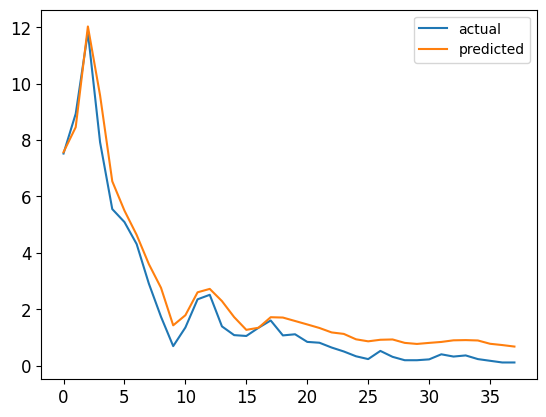

In [46]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [47]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(40, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=75)

Epoch 1/75
3/3 [==============================] - 1s 4ms/step - loss: 0.9628
Epoch 2/75
3/3 [==============================] - 0s 4ms/step - loss: 0.8254
Epoch 3/75
3/3 [==============================] - 0s 2ms/step - loss: 0.6795
Epoch 4/75
3/3 [==============================] - 0s 4ms/step - loss: 0.5599
Epoch 5/75
3/3 [==============================] - 0s 4ms/step - loss: 0.4457
Epoch 6/75
3/3 [==============================] - 0s 2ms/step - loss: 0.3504
Epoch 7/75
3/3 [==============================] - 0s 2ms/step - loss: 0.2617
Epoch 8/75
3/3 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 9/75
3/3 [==============================] - 0s 2ms/step - loss: 0.1354
Epoch 10/75
3/3 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 11/75
3/3 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 12/75
3/3 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 13/75
3/3 [==============================] - 0s 4ms/step - loss: 0.

In [49]:
### Predictions

In [50]:
#Predict:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [51]:

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [52]:
comparison

,actual,predicted
0,7.52,7.756344
1,8.93,8.949852
2,11.82,12.681816
3,7.92,8.291651
4,5.55,6.027155
5,5.09,5.649104
6,4.31,4.452239
7,2.91,3.366717
8,1.73,2.252537
9,0.69,0.810581


In [53]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.10661541015501282

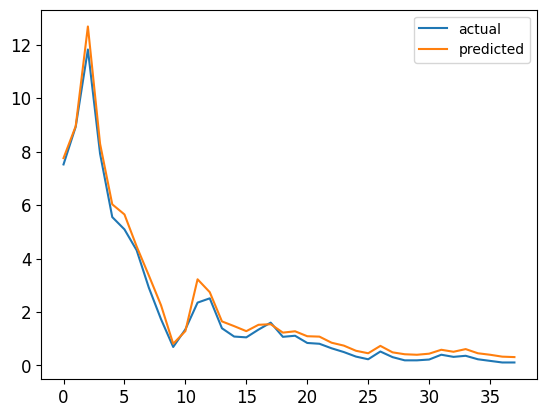

In [54]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [55]:
## Simple RNN with more layers

In [56]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(30, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(25, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=75)

Epoch 1/75
3/3 [==============================] - 1s 5ms/step - loss: 0.6591
Epoch 2/75
3/3 [==============================] - 0s 3ms/step - loss: 0.4389
Epoch 3/75
3/3 [==============================] - 0s 4ms/step - loss: 0.2851
Epoch 4/75
3/3 [==============================] - 0s 5ms/step - loss: 0.1847
Epoch 5/75
3/3 [==============================] - 0s 3ms/step - loss: 0.1249
Epoch 6/75
3/3 [==============================] - 0s 4ms/step - loss: 0.1121
Epoch 7/75
3/3 [==============================] - 0s 5ms/step - loss: 0.0931
Epoch 8/75
3/3 [==============================] - 0s 4ms/step - loss: 0.0571
Epoch 9/75
3/3 [==============================] - 0s 3ms/step - loss: 0.0468
Epoch 10/75
3/3 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 11/75
3/3 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 12/75
3/3 [==============================] - 0s 4ms/step - loss: 0.0270
Epoch 13/75
3/3 [==============================] - 0s 5ms/step - loss: 0.

In [58]:
#Predict:
y_pred = model.predict(test_x)


2/2 [==============================] - 0s 5ms/step


In [59]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [60]:
comparison

,actual,predicted
0,7.52,7.482804
1,8.93,8.834620
2,11.82,12.389721
3,7.92,8.830056
4,5.55,6.102554
5,5.09,5.455909
6,4.31,4.418757
7,2.91,3.268066
8,1.73,2.172934
9,0.69,0.992937


In [61]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.21287013640947366

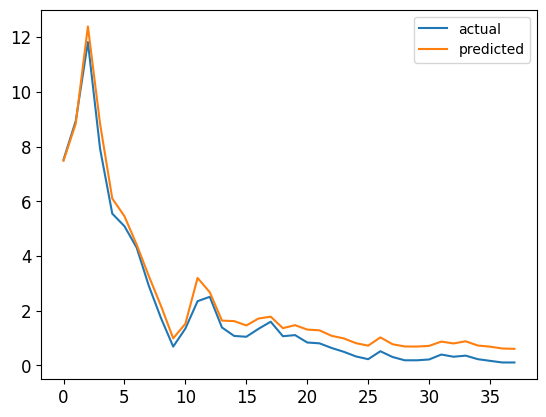

In [62]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [63]:
# LSTM with one layer

In [64]:
model = keras.models.Sequential([
    keras.layers.LSTM(45, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=45)

Epoch 1/45
3/3 [==============================] - 1s 5ms/step - loss: 0.7889
Epoch 2/45
3/3 [==============================] - 0s 5ms/step - loss: 0.7263
Epoch 3/45
3/3 [==============================] - 0s 4ms/step - loss: 0.6593
Epoch 4/45
3/3 [==============================] - 0s 6ms/step - loss: 0.6023
Epoch 5/45
3/3 [==============================] - 0s 3ms/step - loss: 0.5429
Epoch 6/45
3/3 [==============================] - 0s 3ms/step - loss: 0.4875
Epoch 7/45
3/3 [==============================] - 0s 6ms/step - loss: 0.4294
Epoch 8/45
3/3 [==============================] - 0s 4ms/step - loss: 0.3736
Epoch 9/45
3/3 [==============================] - 0s 5ms/step - loss: 0.3269
Epoch 10/45
3/3 [==============================] - 0s 4ms/step - loss: 0.2703
Epoch 11/45
3/3 [==============================] - 0s 4ms/step - loss: 0.2199
Epoch 12/45
3/3 [==============================] - 0s 6ms/step - loss: 0.1657
Epoch 13/45
3/3 [==============================] - 0s 4ms/step - loss: 0.

In [66]:
### Predictions

In [67]:
#Predict:
y_pred = model.predict(test_x)


2/2 [==============================] - 0s 4ms/step


In [68]:

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [69]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.1341876904300239

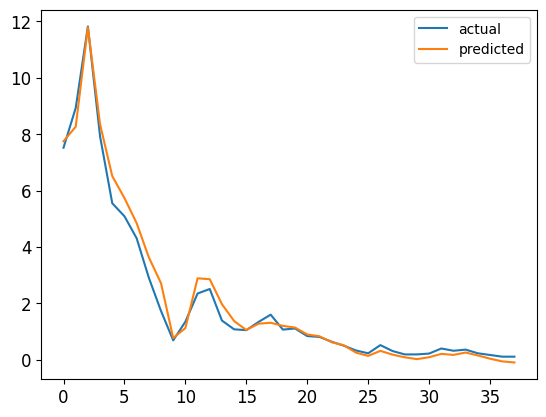

In [70]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [71]:
# LSTM with more layers

In [126]:
model = keras.models.Sequential([
    keras.layers.LSTM(45, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(60, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [127]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 11ms/step - loss: 0.7284
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.5356
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.3343
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1775
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.1002
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1529
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 0.1129
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0699
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0686
Epoch 10/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0755
Epoch 11/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0717
Epoch 12/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0590
Epoch 13/100
3/3 [==============================]

In [128]:
y_pred = model.predict(test_x)

2/2 [==============================] - 1s 3ms/step


In [129]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [130]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.5884940961642142

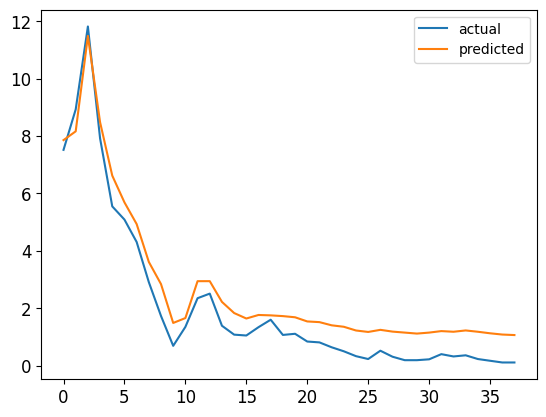

In [131]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [132]:
# GRU (with more layers)

In [133]:
model = keras.models.Sequential([
    keras.layers.GRU(40, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(30, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [134]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=70)

Epoch 1/70
3/3 [==============================] - 2s 8ms/step - loss: 0.6657
Epoch 2/70
3/3 [==============================] - 0s 8ms/step - loss: 0.4208
Epoch 3/70
3/3 [==============================] - 0s 8ms/step - loss: 0.2688
Epoch 4/70
3/3 [==============================] - 0s 9ms/step - loss: 0.1662
Epoch 5/70
3/3 [==============================] - 0s 9ms/step - loss: 0.1143
Epoch 6/70
3/3 [==============================] - 0s 9ms/step - loss: 0.0944
Epoch 7/70
3/3 [==============================] - 0s 8ms/step - loss: 0.0823
Epoch 8/70
3/3 [==============================] - 0s 8ms/step - loss: 0.0749
Epoch 9/70
3/3 [==============================] - 0s 10ms/step - loss: 0.0645
Epoch 10/70
3/3 [==============================] - 0s 8ms/step - loss: 0.0599
Epoch 11/70
3/3 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 12/70
3/3 [==============================] - 0s 8ms/step - loss: 0.0491
Epoch 13/70
3/3 [==============================] - 0s 10ms/step - loss: 

In [135]:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 5ms/step


In [136]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [137]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.14002876996099148

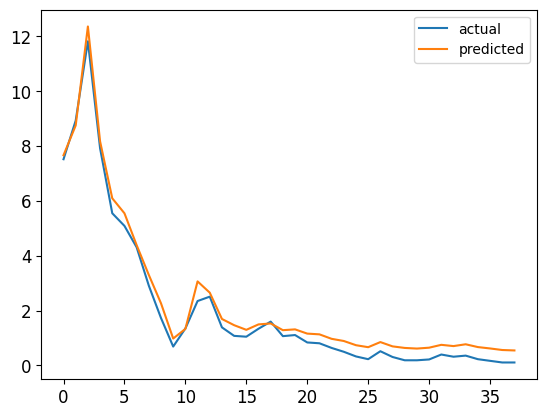

In [138]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

In [139]:
# Conv1D

In [140]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(20, activation='relu', return_sequences=True),
    keras.layers.GRU(15, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [141]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=70)

Epoch 1/70
3/3 [==============================] - 2s 43ms/step - loss: 0.7944
Epoch 2/70
3/3 [==============================] - 0s 42ms/step - loss: 0.6657
Epoch 3/70
3/3 [==============================] - 0s 41ms/step - loss: 0.5395
Epoch 4/70
3/3 [==============================] - 0s 41ms/step - loss: 0.4324
Epoch 5/70
3/3 [==============================] - 0s 40ms/step - loss: 0.3277
Epoch 6/70
3/3 [==============================] - 0s 40ms/step - loss: 0.2385
Epoch 7/70
3/3 [==============================] - 0s 40ms/step - loss: 0.1642
Epoch 8/70
3/3 [==============================] - 0s 40ms/step - loss: 0.1183
Epoch 9/70
3/3 [==============================] - 0s 43ms/step - loss: 0.1006
Epoch 10/70
3/3 [==============================] - 0s 43ms/step - loss: 0.1048
Epoch 11/70
3/3 [==============================] - 0s 40ms/step - loss: 0.1070
Epoch 12/70
3/3 [==============================] - 0s 42ms/step - loss: 0.0967
Epoch 13/70
3/3 [==============================] - 0s 43ms/st

In [142]:
y_pred = model.predict(test_x)

2/2 [==============================] - 0s 4ms/step


In [143]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [144]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.11096064486247534

We have take 5 years stocks data on Mullen Automotive company. we have fitted the following models and their Errors respectively
1) Neural Network - 0.16
2) RNN - 0.10
3) Rnn with multiple layers - 2.10
4) Lstm with one layer - 0.13
5) LSTM with multiple layer - 0.58
6) GRU with multiple layer - 0.11

From the above Mean square error (MSE) we can see that RNN with single layer has the lowest mse values, Hence the best fit model for the Mullen Automotive data. we can say that our model can predict the values with the limitation of(+-0.10)